<a href="https://colab.research.google.com/github/Skannan03/codsoft/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1st Assignment of Congorise Infotech

# Approach to the prediction
* 1.Import all libaray
* 2.Load and audit the data
* 3.Data prepration and Data Transformation
    * 1.Dealing with missing value
    * 2.Inconsistent value: Replace all transformation with consistent values
    * 3.Dealing With Outliers
* 4.Data visualization
* 5.Data analysis
    * 1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    * 2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    * 3.Multi-Variate Analysis
        * 1.Regression:Not a regressiion
        * 2.Classification
            

#Import all libaray

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Load the dataset

In [3]:
df=pd.read_csv('/content/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#Data visualization

<ipython-input-9-7188315ab755>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


<Axes: xlabel='Time', ylabel='Density'>

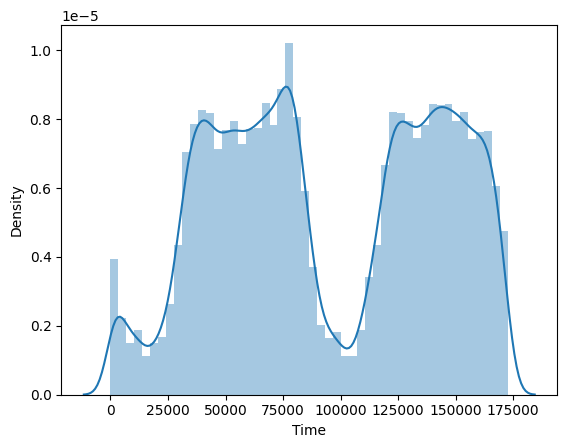

In [9]:
sns.distplot(df['Time'])

<ipython-input-10-40e6003ccc36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

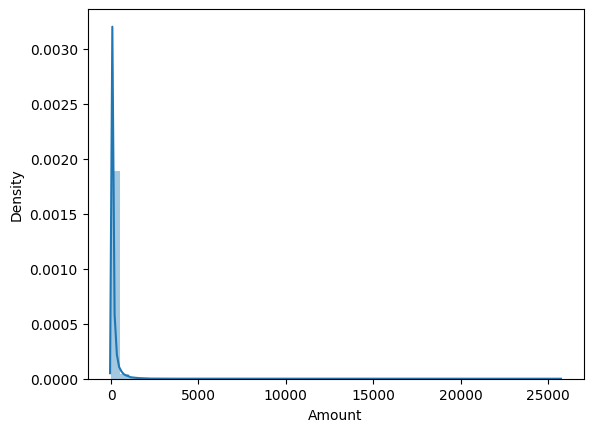

In [10]:
sns.distplot(df['Amount'])

(0.0, 1.05)

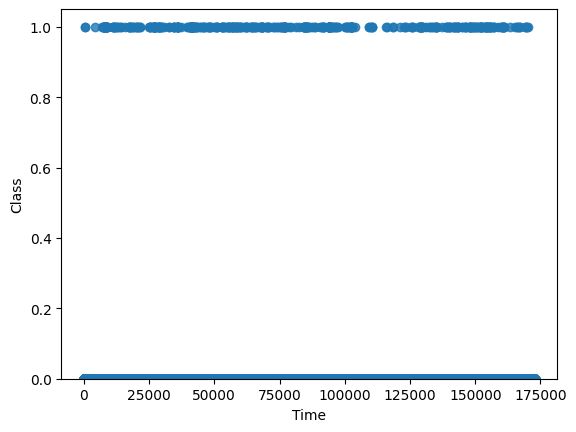

In [11]:
sns.regplot(x='Time',y='Class',data=df)
plt.ylim(0,)

### Splitting the dataset

In [12]:
x=df.drop("Class",axis=1)
y=df["Class"]

#Train test split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

#Scaling the dataset using standard scaler

In [14]:
scalar=StandardScaler()
x_train_scal=scalar.fit_transform(x_train)
x_test_scal=scalar.fit_transform(x_test)

In [15]:
def acc_report(actual,predicted):
   acc_score=accuracy_score(actual,predicted)
   cn_matrix=confusion_matrix(actual,predicted)
   cla_report=classification_report(actual,predicted)
   print('accuracy::',acc_score.round(2))
   print(cn_matrix)
   print(cla_report)

#Logistic regression

In [16]:
lr=LogisticRegression()
lr.fit(x_train_scal,y_train)
preds_ytrain_lr=lr.predict(x_train_scal)
preds_ytest_lr=lr.predict(x_test_scal)

In [17]:
acc_report(y_test,preds_ytest_lr)
acc_report(y_train,preds_ytrain_lr)

accuracy:: 1.0
[[56833    14]
 [   46    69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.60      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962

accuracy:: 1.0
[[227439     29]
 [   141    236]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227468
           1       0.89      0.63      0.74       377

    accuracy                           1.00    227845
   macro avg       0.94      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



#Decision tree classifier

In [18]:
dtc=DecisionTreeClassifier(max_depth=5,min_samples_split=2)
dtc.fit(x_train_scal,y_train)
preds_ytrain_dtc=dtc.predict(x_train_scal)
preds_ytest_dtc=dtc.predict(x_test_scal)

In [19]:
acc_report(y_train,preds_ytrain_dtc)
acc_report(y_test,preds_ytest_dtc)

accuracy:: 1.0
[[227457     11]
 [    80    297]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227468
           1       0.96      0.79      0.87       377

    accuracy                           1.00    227845
   macro avg       0.98      0.89      0.93    227845
weighted avg       1.00      1.00      1.00    227845

accuracy:: 1.0
[[56837    10]
 [   28    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.90      0.76      0.82       115

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



#Random forest classifier

In [20]:
rf= RandomForestClassifier(n_estimators=200 ,max_depth=5 ,verbose=1)
rf.fit(x_train_scal,y_train)
preds_rf_train=rf.predict(x_train_scal)
preds_rf_test=rf.predict(x_test_scal)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   43.3s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  3.0min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    2.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s


In [21]:

acc_report(y_train,preds_rf_train)
acc_report(y_test,preds_rf_test)

accuracy:: 1.0
[[227459      9]
 [    92    285]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227468
           1       0.97      0.76      0.85       377

    accuracy                           1.00    227845
   macro avg       0.98      0.88      0.92    227845
weighted avg       1.00      1.00      1.00    227845

accuracy:: 1.0
[[56840     7]
 [   34    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.92      0.70      0.80       115

    accuracy                           1.00     56962
   macro avg       0.96      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



#Gradient boosting classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier()
gb.fit(x_train_scal,y_train)
preds_gb_train=gb.predict(x_train_scal)
preds_gb_test=gb.predict(x_test_scal)
acc_report(y_train,preds_gb_train)
acc_report(y_test,preds_gb_test)

accuracy:: 1.0
[[227449     19]
 [   171    206]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227468
           1       0.92      0.55      0.68       377

    accuracy                           1.00    227845
   macro avg       0.96      0.77      0.84    227845
weighted avg       1.00      1.00      1.00    227845

accuracy:: 1.0
[[56842     5]
 [   53    62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.93      0.54      0.68       115

    accuracy                           1.00     56962
   macro avg       0.96      0.77      0.84     56962
weighted avg       1.00      1.00      1.00     56962



#Upsampling using smote

In [23]:
from imblearn.over_sampling import SMOTE
smp=SMOTE()

In [24]:
x_smote,y_smote=smp.fit_resample(x ,y)

In [25]:
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=2)


#Logistic Regression

In [26]:
lr.fit(x_sm_train,y_sm_train)
preds_ytrain_lr=lr.predict(x_sm_train)
preds_ytest_lr=lr.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_lr)
acc_report(y_sm_test,preds_ytest_lr)

accuracy:: 0.97
[[223340   4469]
 [  8047 219048]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    227809
           1       0.98      0.96      0.97    227095

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904

accuracy:: 0.97
[[55345  1161]
 [ 2076 55144]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56506
           1       0.98      0.96      0.97     57220

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



#Decision tree classifier

In [27]:
dtc.fit(x_sm_train,y_sm_train)
preds_ytrain_dtc=dtc.predict(x_sm_train)
preds_ytest_dtc=dtc.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_dtc)
acc_report(y_sm_test,preds_ytest_dtc)

accuracy:: 0.97
[[223805   4004]
 [  9232 217863]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    227809
           1       0.98      0.96      0.97    227095

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904

accuracy:: 0.97
[[55434  1072]
 [ 2349 54871]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56506
           1       0.98      0.96      0.97     57220

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



#random forest classifier

In [28]:
rf.fit(x_sm_train,y_sm_train)
preds_ytrain_rf=rf.predict(x_sm_train)
preds_ytest_rf=rf.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_rf)
acc_report(y_sm_test,preds_ytest_rf)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:  6.3min
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    6.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.5s


accuracy:: 0.97
[[226603   1206]
 [ 12982 214113]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    227809
           1       0.99      0.94      0.97    227095

    accuracy                           0.97    454904
   macro avg       0.97      0.97      0.97    454904
weighted avg       0.97      0.97      0.97    454904

accuracy:: 0.97
[[56196   310]
 [ 3358 53862]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     56506
           1       0.99      0.94      0.97     57220

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



#Gradient boosting classifier

In [29]:
gb.fit(x_sm_train,y_sm_train)
preds_ytrain_gb=gb.predict(x_sm_train)
preds_ytest_gb=gb.predict(x_sm_test)

acc_report(y_sm_train,preds_ytrain_gb)
acc_report(y_sm_test,preds_ytest_gb)

accuracy:: 0.99
[[226538   1271]
 [  4281 222814]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    227809
           1       0.99      0.98      0.99    227095

    accuracy                           0.99    454904
   macro avg       0.99      0.99      0.99    454904
weighted avg       0.99      0.99      0.99    454904

accuracy:: 0.99
[[56149   357]
 [ 1161 56059]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     56506
           1       0.99      0.98      0.99     57220

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

